# Project - explore Titanic data

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. [from kaggle-titanic](https://www.kaggle.com/c/titanic)

In this project, we will use the historical data to analyze what factors made people more likely survive. This is a binary classification quesion. We will utilize machine learning algorithms to handle this quesion.

In [69]:
# numpy, pandas, matplotlib, serborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1. Data Wrangling

In [70]:
! head titanic-data.csv

In [71]:
! tail titanic-data.csv

In [75]:
# get titanic csv files as a DataFrame
titanic_df = pd.read_csv("titanic-data.csv")

# preview the data, usually I will examine the head and the tail of the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print("----------------------------")
titanic_df.info()
print("----------------------------")

----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------


In [7]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
titanic_df.describe()

/Users/bowenzhi/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.shape

(891, 12)

In [74]:
# titanic_df.isnull()

In [11]:
titanic_df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#titanic_df1 = titanic_df.drop('Cabin', axis=1)

In [15]:
# titanic_df =titanic_df.dropna()

In [16]:
titanic_df.shape

(891, 11)

In [77]:
titanic_df.query("Sex=='female' & Age > 60")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [78]:
titanic_df[(titanic_df["Sex"]=='female') & (titanic_df.Age > 60)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [79]:
titanic_df['logFare'] = titanic_df['Fare'].apply(lambda x:np.log(x))

In [80]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.085672


In [81]:
titanic_df = titanic_df.rename(columns={'logFare':'LogFare'})

In [82]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.085672


## 2. Exploratory Data Analysis

We will explore the data column one by one and do data cleaning as well

### Explore the columns one by one
#### Embarked

Description: Port of Embarkation,	C = Cherbourg, Q = Queenstown, S = Southampton

In [83]:
print "There are {} missing value in Embarkd.".format(titanic_df["Embarked"].isnull().sum())
# Fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

There are 2 missing value in Embarkd.


Replace C, Q, S with the full name

In [84]:
titanic_df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace=True)

In [85]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,2.085672


Plot the relations between emberked and survived


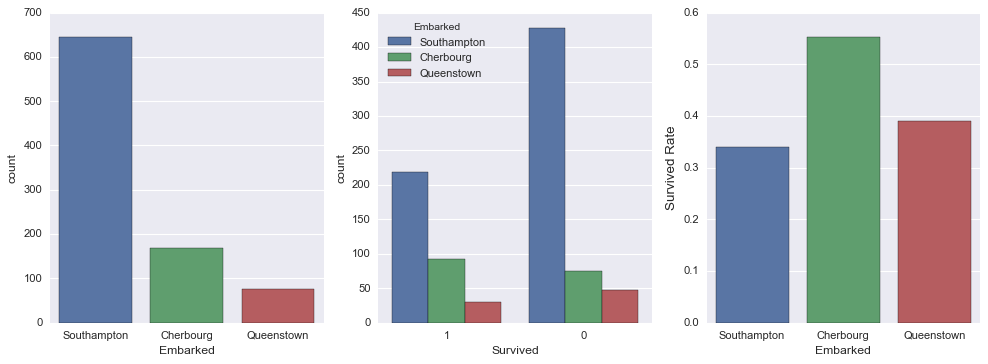

In [22]:
# plot
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['Southampton','Cherbourg','Queenstown'],ax=axis3)
plt.ylabel('Survived Rate', fontsize=12)

In [23]:
titanic_df.Embarked.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [30]:
titanic_df[['PassengerId','Survived','Embarked']].groupby(['Survived','Embarked']).count()

PassengerId
Survived Embarked                
0        Cherbourg             75
         Queenstown            47
         Southampton          427
1        Cherbourg             93
         Queenstown            30
         Southampton          219

In [31]:
titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.339009


From the above graph, the number of people embarked at Southampton was the most, while the survived rate at Queenstown was the hightest.

In [12]:
# one-hot-encoding, convert Embarked to dummy varibles
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
print embark_dummies_titanic.head()

   Cherbourg  Queenstown  Southampton
0        0.0         0.0          1.0
1        1.0         0.0          0.0
2        0.0         0.0          1.0
3        0.0         0.0          1.0
4        0.0         0.0          1.0


In [13]:
# concatenate embark_dummies_titanic to titanic_df and then drop the 'Embarked' column
titanic_df = pd.concat([titanic_df, embark_dummies_titanic], axis=1)
titanic_df = titanic_df.drop('Embarked', axis=1)

In [14]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,NaN,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C85,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,NaN,0.0,0.0,1.0


### Sex

There are only two classes for Sex: male and female. In order to train model, we convert the categorical values into numerical factors

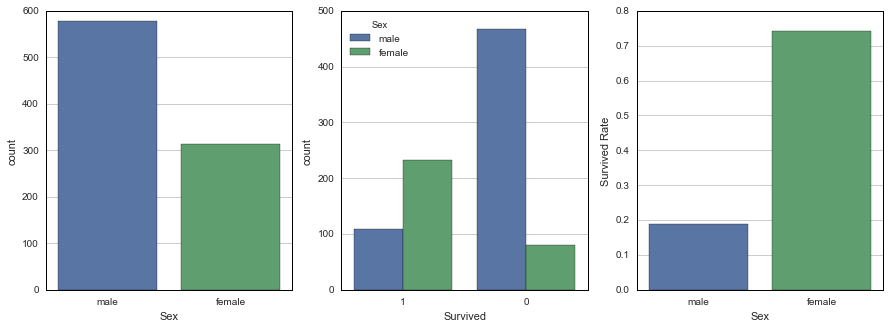

In [20]:
# plot the distribution of sex and the survived rate for each class

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Sex', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Sex", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=embark_perc,order=['male','female'],ax=axis3)
plt.ylabel('Survived Rate')

There were more males than females on the ship. Obviously, the survived rate for female was significatly higher than that for male.

In [21]:
titanic_df['Sex'] = titanic_df.Sex.map({'male':1, 'female':0})

In [23]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [22]:
titanic_df[['Survived', 'Sex']].corr()

,Survived,Sex
Survived,1.000000,-0.543351
Sex,-0.543351,1.000000


### Age 


In [24]:
#get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

print "The average of age in titanic_df is {}.".format(average_age_titanic)
print "The standard deviation of age in titanic_df is {}.".format(std_age_titanic)
print "The number of missing value of age in titanic_df is {}.".format(count_nan_age_titanic)

The average of age in titanic_df is 29.6991176471.
The standard deviation of age in titanic_df is 14.5264973323.
The number of missing value of age in titanic_df is 177.


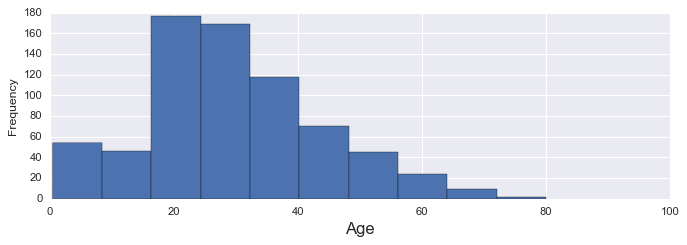

In [53]:
# plot
titanic_df['Age'].plot(kind='hist', figsize=(10,3),bins=10, xlim=(0,100))
plt.xlabel('Age', fontsize=15)



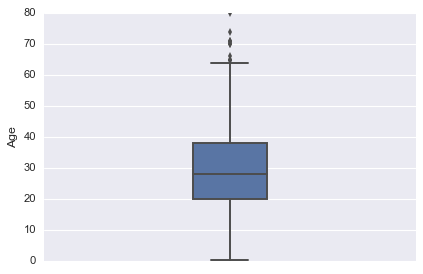

In [54]:
sns.boxplot(titanic_df.Age, orient='v', showfliers=True, width=0.2)

### Fare

In [55]:
print "There are {} missing value in Fare.".format(titanic_df['Fare'].isnull().sum())

There are 0 missing value in Fare.


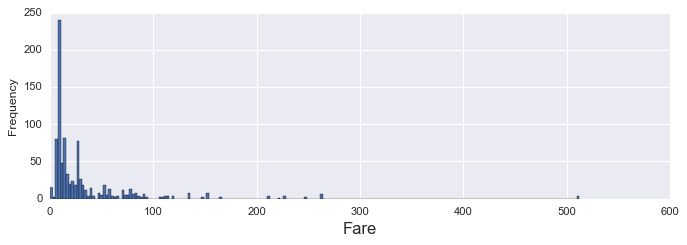

In [57]:
# plot
titanic_df['Fare'].plot(kind='hist', figsize=(10,3),bins=200, xlim=(0,600))
plt.xlabel('Fare', fontsize=15)



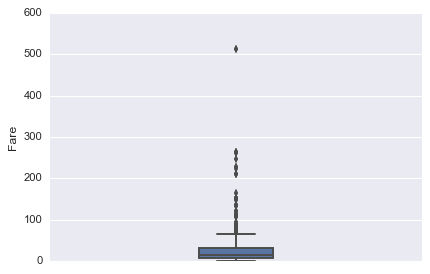

In [50]:
sns.boxplot(titanic_df.Fare, orient='v', showfliers=True, width=0.2)

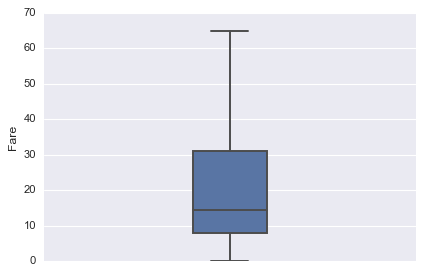

In [51]:
sns.boxplot(titanic_df.Fare, orient='v', showfliers=False, width=0.2)

### Family

Instead of having two columns Parch & SibSp, 
we can have only one column represent if the passenger had any family member aboard or not,
Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.

/Users/bowenzhi/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[<matplotlib.text.Text at 0x117866810>, <matplotlib.text.Text at 0x1141746d0>]

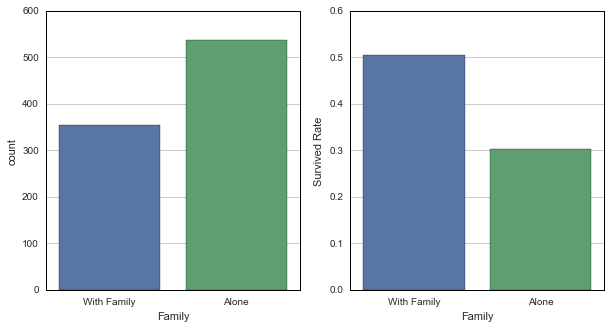

In [34]:

titanic_df_1['Family'] =  titanic_df_1["Parch"] + titanic_df_1["SibSp"]
titanic_df_1['Family'].loc[titanic_df_1['Family'] > 0] = 1
titanic_df_1['Family'].loc[titanic_df_1['Family'] == 0] = 0

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=titanic_df_1, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df_1[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)
plt.ylabel('Survived Rate')
axis1.set_xticklabels(["With Family","Alone"], rotation=0)

The graphs show that there were more alone people than people with family. However, people with family had a higher survived rate.

### Child

Create a new feature called Child


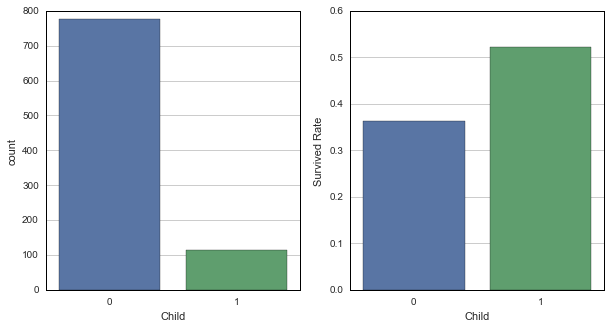

In [35]:
def get_child(age):
    return 1 if age < 16 else 0
    
titanic_df_1['Child'] = titanic_df_1['Age'].apply(get_child)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Child', data=titanic_df_1, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df_1[['Child', 'Survived']].groupby(['Child'],as_index=False).mean()
sns.barplot(x='Child', y='Survived', data=person_perc, ax=axis2)
plt.ylabel('Survived Rate')
# axis1.set_xticklabels(["Adult","Child"], rotation=0)
# axis2.set_xticklabels(["Adult","Child"], rotation=0)

As we see, children(age < ~16) on aboard seem to have a high chances for Survival. 



### Pclass

Pclass denotes Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd. 

We will have a look at the relation between survived rate and Pclass

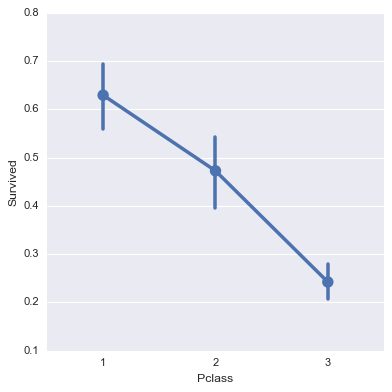

In [35]:
# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

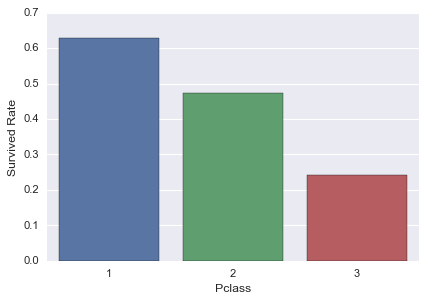

In [40]:
# group by embarked, and get the mean for survived passengers for each value in Pclass
p_perc = titanic_df[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=p_perc, order=[1,2,3])
plt.ylabel('Survived Rate')

In [38]:
titanic_df[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Obviously, people with higher ticket class had a higher survived rate.